In [484]:
# !pip install pandas_datareader

In [5]:
import pandas as pd
from pandas_datareader import data
%matplotlib inline

In [18]:
start = '2021-01-01'
end = '2022-12-31'

In [19]:
# 日経
hist_prices1 = data.DataReader('1321.T', 'yahoo', start, end)

In [20]:
hist_prices1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,28480,27870,28480,28140,247890,28140
2021-01-05,28130,27920,27970,27990,161161,27990
2021-01-06,28030,27830,27930,27910,251511,27910
2021-01-07,28470,28220,28230,28310,195656,28310
2021-01-08,28990,28530,28580,28990,363992,28990
...,...,...,...,...,...,...
2021-12-21,29430,29115,29265,29405,231018,29405
2021-12-22,29585,29375,29530,29440,80686,29440
2021-12-23,29695,29545,29610,29695,137537,29695


In [21]:
# ダウ
hist_prices2 = data.DataReader('^DJI', 'yahoo', start, end)

In [22]:
hist_prices2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,30637.470703,30344.500000,30417.640625,30606.480469,284470000,30606.480469
2021-01-04,30674.279297,29881.820312,30627.470703,30223.890625,475080000,30223.890625
2021-01-05,30504.890625,30141.779297,30204.250000,30391.599609,350910000,30391.599609
2021-01-06,31022.650391,30313.070312,30362.779297,30829.400391,500430000,30829.400391
2021-01-07,31193.400391,30897.859375,30901.179688,31041.130859,427810000,31041.130859
...,...,...,...,...,...,...
2021-12-17,35800.109375,35284.261719,35800.109375,35365.441406,750480000,35365.441406
2021-12-20,35222.121094,34665.500000,35222.121094,34932.160156,386590000,34932.160156
2021-12-21,35508.960938,35069.500000,35069.500000,35492.699219,346080000,35492.699219


In [23]:
# Drop field
drop = ['Adj Close','Volume']
hist_prices1 = hist_prices1.drop(columns=drop,axis=1) 
hist_prices2 = hist_prices2.drop(columns=drop,axis=1) 

In [24]:
hist_prices_cal1 = hist_prices1.copy()
hist_prices_cal2 = hist_prices2.copy()

In [25]:
hist_prices_cal1

,High,Low,Open,Close
Date,,,,
2021-01-04,28480,27870,28480,28140
2021-01-05,28130,27920,27970,27990
2021-01-06,28030,27830,27930,27910
2021-01-07,28470,28220,28230,28310
2021-01-08,28990,28530,28580,28990
...,...,...,...,...
2021-12-21,29430,29115,29265,29405
2021-12-22,29585,29375,29530,29440
2021-12-23,29695,29545,29610,29695


In [26]:
hist_prices_cal2

,High,Low,Open,Close
Date,,,,
2020-12-31,30637.470703,30344.500000,30417.640625,30606.480469
2021-01-04,30674.279297,29881.820312,30627.470703,30223.890625
2021-01-05,30504.890625,30141.779297,30204.250000,30391.599609
2021-01-06,31022.650391,30313.070312,30362.779297,30829.400391
2021-01-07,31193.400391,30897.859375,30901.179688,31041.130859
...,...,...,...,...
2021-12-17,35800.109375,35284.261719,35800.109375,35365.441406
2021-12-20,35222.121094,34665.500000,35222.121094,34932.160156
2021-12-21,35508.960938,35069.500000,35069.500000,35492.699219


<AxesSubplot:xlabel='Date'>

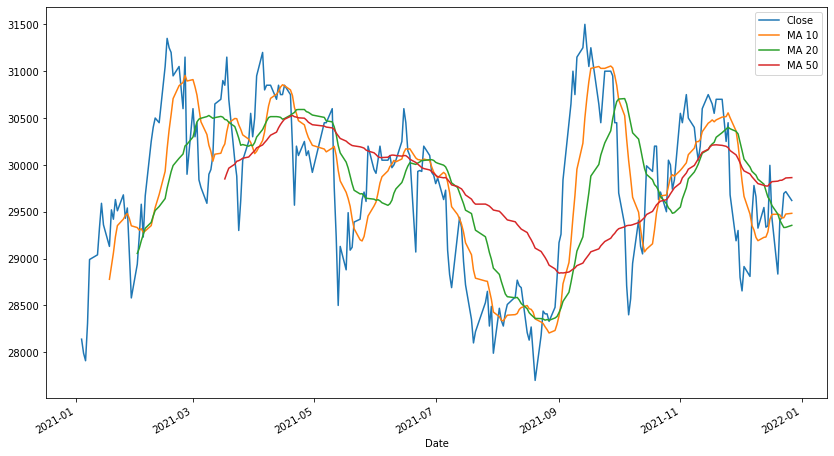

In [28]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA {}".format(str(ma))
    hist_prices1[column_name]=hist_prices1['Close'].rolling(window=ma).mean()
    
hist_prices1[['Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(14,8))

<AxesSubplot:xlabel='Date'>

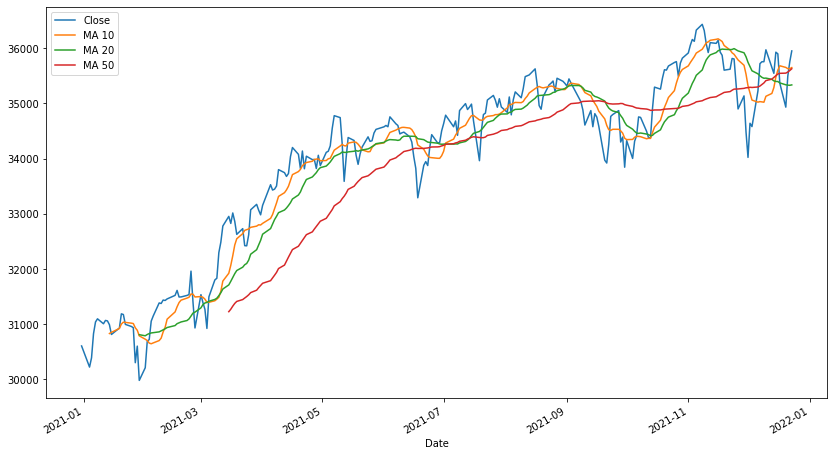

In [29]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA {}".format(str(ma))
    hist_prices2[column_name]=hist_prices2['Close'].rolling(window=ma).mean()
    
hist_prices2[['Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(14,8))

## マージ

In [30]:
hist_prices_merge=pd.merge(hist_prices_cal1,hist_prices_cal2,left_index=True,right_index=True,how='inner')

In [31]:
hist_prices_merge

,High_x,Low_x,Open_x,Close_x,High_y,Low_y,Open_y,Close_y
Date,,,,,,,,
2021-01-04,28480,27870,28480,28140,30674.279297,29881.820312,30627.470703,30223.890625
2021-01-05,28130,27920,27970,27990,30504.890625,30141.779297,30204.250000,30391.599609
2021-01-06,28030,27830,27930,27910,31022.650391,30313.070312,30362.779297,30829.400391
2021-01-07,28470,28220,28230,28310,31193.400391,30897.859375,30901.179688,31041.130859
2021-01-08,28990,28530,28580,28990,31140.669922,30793.269531,31069.580078,31097.970703
...,...,...,...,...,...,...,...,...
2021-12-17,29815,29405,29735,29440,35800.109375,35284.261719,35800.109375,35365.441406
2021-12-20,29330,28785,29185,28835,35222.121094,34665.500000,35222.121094,34932.160156
2021-12-21,29430,29115,29265,29405,35508.960938,35069.500000,35069.500000,35492.699219


## マージしない場合

In [36]:
hist_prices_merge=hist_prices_cal1.rename(columns={'Close': 'Close_x'})

## 調整

In [37]:
hist_prices_merge = hist_prices_merge.drop(hist_prices_merge.index[[-1]])
hist_prices_merge

,High,Low,Open,Close_x
Date,,,,
2021-01-04,28480,27870,28480,28140
2021-01-05,28130,27920,27970,27990
2021-01-06,28030,27830,27930,27910
2021-01-07,28470,28220,28230,28310
2021-01-08,28990,28530,28580,28990
...,...,...,...,...
2021-12-20,29330,28785,29185,28835
2021-12-21,29430,29115,29265,29405
2021-12-22,29585,29375,29530,29440


In [38]:
# ライブラリの取得
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")　多分いらなそう
# import oandapy
import configparser
import datetime
from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

# CSVデータの読み込み
import os
working_directory=os.getcwd()
# path_train=working_directory+'/finance2_train.csv'
# path_test=working_directory+'/finance2_test.csv'
# path_submit=working_directory+'/finance2_submit.csv'

#データフレームの生成
# df_train=hist_prices_cal
# df_test=pd.read_csv(path_test)
# df_submit=pd.read_csv(path_submit)

In [39]:
# Dateがobject型になっているので日付型に変換
# df_train['Date']=pd.to_datetime(df_train['Date'],format='%Y/%m/%d')
# df_test['Date']=pd.to_datetime(df_test['Date'],format='%Y/%m/%d')

##　配列の型などを調べる関数

In [40]:
# 変数名をそのままprint関数内で表示させる関数
def chkprint(*args):
    for obj in args:
        for k, v in globals().items():
            if id(v) == id(obj):
                target = k
                break          
    return target

# データがどのデータ型か、列数、行数を表示する関数
def typeInfo(targetData):
    if (type(targetData) is pd.core.frame.DataFrame):
        print("{} は DataFrame型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is list):
        print("{} は list型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), pd.DataFrame(targetData).shape))    # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is np.ndarray):
        print("{} は ndarray型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is pd.core.series.Series):
        print("{} は Series型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる

## 分割

In [41]:
# train_test_splitのインポート
from sklearn.model_selection import train_test_split
# 学習データと検証データに75:25の割合で2分割する
df_train,df_test = train_test_split(hist_prices_merge, test_size=0.25, shuffle=False)

In [42]:
# 配列抜粋
print(f'df_train : {df_train}\n')
print(f'df_test\n{df_test}\n')

df_train :              High    Low   Open  Close_x
Date                                    
2021-01-04  28480  27870  28480    28140
2021-01-05  28130  27920  27970    27990
2021-01-06  28030  27830  27930    27910
2021-01-07  28470  28220  28230    28310
2021-01-08  28990  28530  28580    28990
...           ...    ...    ...      ...
2021-09-21  30850  30500  30600    30650
2021-09-22  30650  30300  30550    30450
2021-09-24  31050  30850  31000    31000
2021-09-27  31200  30950  31050    31000
2021-09-28  31000  30750  30950    30950

[180 rows x 4 columns]

df_test
             High    Low   Open  Close_x
Date                                    
2021-09-29  30650  30250  30500    30450
2021-09-30  30600  30250  30550    30450
2021-10-01  30350  29590  30200    29700
2021-10-04  30050  29230  30050    29360
2021-10-05  28880  28330  28800    28710
...           ...    ...    ...      ...
2021-12-20  29330  28785  29185    28835
2021-12-21  29430  29115  29265    29405
2021-12-22  2

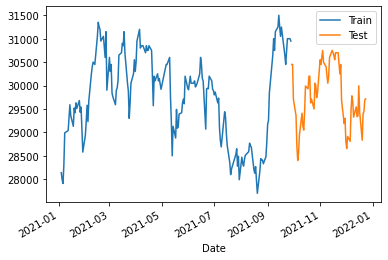

In [43]:
# 学習データのCloseの描画
df_train['Close_x'].plot(kind='line')
# 評価データのCloseの描画
df_test['Close_x'].plot(kind='line')
# 折れ線グラフの凡例を表示
plt.legend(['Train', 'Test'])
# 描画の実行
plt.show()

##　LSTMモデルへ訓練させるための前処理

In [44]:
# windowを設定
window_len=5

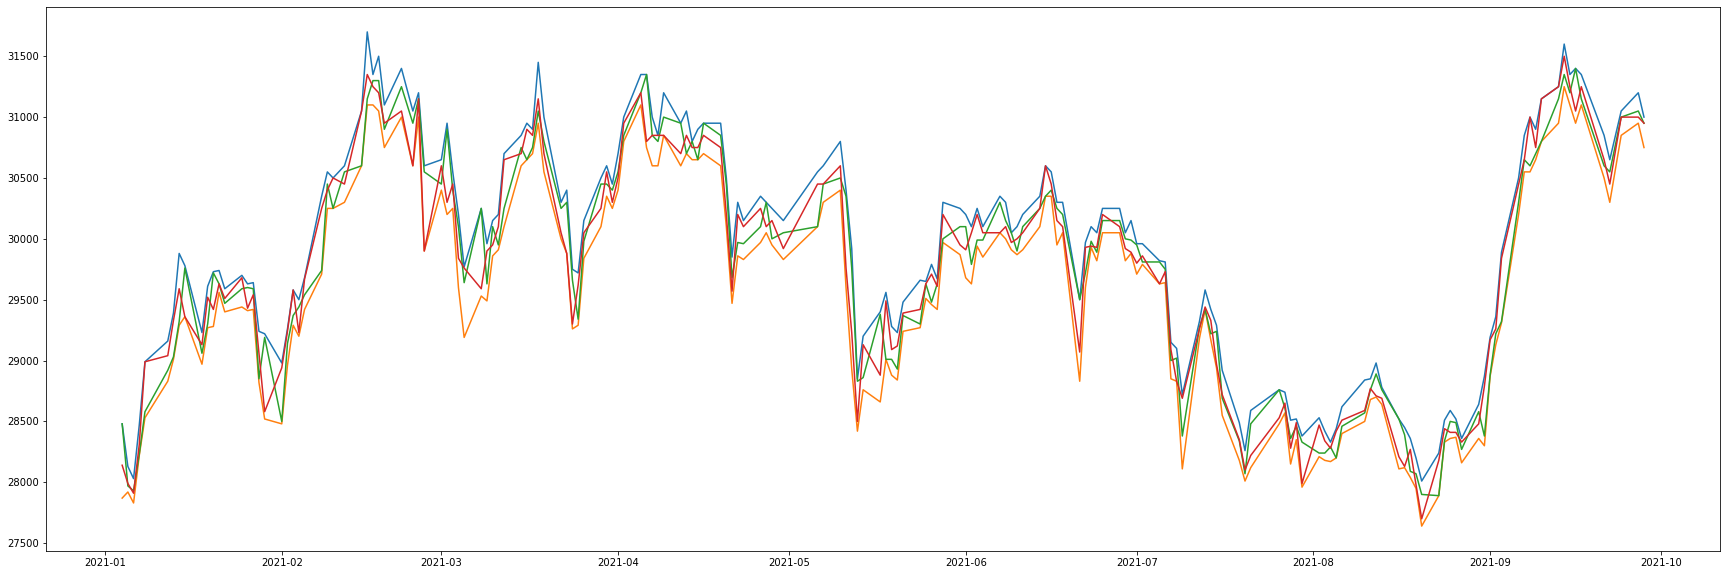

In [45]:
fig = plt.subplots(figsize=(30,10))
plt.plot(df_train)

In [46]:
# # LSTMへの入力用に処理の関数
# def data_maker(data):
# #   ArrayAmt= len(data) - window_len+1 if len(data) % 2 == 0 else len(data) - window_len

#   data_lstm_in=[]
#   if len(data)==window_len:
#     temp = data[:window_len].copy()
#     temp = temp / temp.iloc[0] - 1
#     data_lstm_in.append(temp)
#   for i in range(len(data) - window_len): #今回のLSTMで生成する時系列データ数(train総数-10個のモデル)    
# #   for i in range(ArrayAmt): #今回のLSTMで生成する時系列データ数(train総数-10個のモデル)
#       temp = data[i:(i + window_len)].copy() #windowの単位で行を取得。参照渡しでなく値渡し。
#       temp = temp / temp.iloc[0] - 1
#       data_lstm_in.append(temp)
#   return data_lstm_in

### 翌日を予測する為に修正

## Train用

In [47]:
# LSTMへの入力用に処理の関数
def data_maker(data):
#   ArrayAmt= len(data) - window_len+1 if len(data) % 2 == 0 else len(data) - window_len

  data_lstm_in=[]
  if len(data)==window_len:
    temp = data[:window_len].copy()
    temp = temp / temp.iloc[0] - 1
    data_lstm_in.append(temp)
  for i in range(len(data) - window_len): #今回のLSTMで生成する時系列データ数(train総数-10個のモデル)    
#   for i in range(ArrayAmt): #今回のLSTMで生成する時系列データ数(train総数-10個のモデル)
      temp = data[i:(i + window_len)].copy() #windowの単位で行を取得。参照渡しでなく値渡し。
      temp = temp / temp.iloc[0] - 1
      data_lstm_in.append(temp)
  return data_lstm_in

In [48]:
#関数の実行(Trainデータ)
train_lstm_in = data_maker(df_train)

In [49]:
# 配列抜粋
print(f'train_lstm_in_配列数 : {len(train_lstm_in)}\n')
print(f'train_lstm_in[0]\n{train_lstm_in[0]}\n')
print(f'train_lstm_in[1]\n{train_lstm_in[1]}\n')
print(f'train_lstm_in[-1]\n{train_lstm_in[-1]}\n')

train_lstm_in_配列数 : 175

train_lstm_in[0]
                High       Low      Open   Close_x
Date                                              
2021-01-04  0.000000  0.000000  0.000000  0.000000
2021-01-05 -0.012289  0.001794 -0.017907 -0.005330
2021-01-06 -0.015801 -0.001435 -0.019312 -0.008173
2021-01-07 -0.000351  0.012558 -0.008778  0.006041
2021-01-08  0.017907  0.023681  0.003511  0.030206

train_lstm_in[1]
                High       Low      Open   Close_x
Date                                              
2021-01-05  0.000000  0.000000  0.000000  0.000000
2021-01-06 -0.003555 -0.003223 -0.001430 -0.002858
2021-01-07  0.012087  0.010745  0.009296  0.011433
2021-01-08  0.030572  0.021848  0.021809  0.035727
2021-01-12  0.036616  0.032593  0.033965  0.037513

train_lstm_in[-1]
                High       Low      Open  Close_x
Date                                             
2021-09-17  0.000000  0.000000  0.000000   0.0000
2021-09-21 -0.015949 -0.019293 -0.017657  -0.0192
2021-09

In [50]:
lstm_train_out = (df_train['Close_x'][window_len:].values / df_train['Close_x'][:-window_len].values)-1

In [51]:
len(lstm_train_out)

175

In [52]:
lstm_train_out

array([ 0.03198294,  0.04787424,  0.06019348,  0.03708937,  0.00482925,
        0.01652893,  0.00306853,  0.00135181,  0.00510899,  0.01888088,
       -0.00304878,  0.00407886, -0.01923726, -0.03151474, -0.02493261,
       -0.006456  ,  0.0013541 ,  0.00584997,  0.03813856,  0.04526607,
        0.03967168,  0.0311021 ,  0.04173794,  0.04651163,  0.03636364,
        0.02796053,  0.02295082,  0.01642036,  0.        , -0.02392344,
       -0.0032    , -0.04166667, -0.01130856, -0.02415459, -0.00490196,
       -0.04205457, -0.00468227, -0.03300654, -0.01320132, -0.01642036,
        0.00871314,  0.02990591,  0.03751267,  0.03344482,  0.03005008,
        0.03488372,  0.00163132, -0.02117264, -0.03300971, -0.05024311,
       -0.04911717, -0.02117264,  0.00665557,  0.02242303,  0.03412969,
        0.02970966,  0.02995008,  0.03140496,  0.00818331,  0.01815182,
        0.01147541, -0.00323102, -0.01602564,  0.00162338, -0.00324149,
       -0.00324149,  0.        ,  0.00162866, -0.02106969, -0.03

## test用

In [53]:
# LSTMへの入力用に処理の関数
def data_maker2(data):
#   ArrayAmt= len(data) - window_len+1 if len(data) % 2 == 0 else len(data) - window_len

  data_lstm_in=[]
  if len(data)==window_len:
    temp = data[:window_len].copy()
    temp = temp / temp.iloc[0] - 1
    data_lstm_in.append(temp)
  for i in range(len(data) - window_len+1): #今回のLSTMで生成する時系列データ数(train総数-10個のモデル)    
#   for i in range(ArrayAmt): #今回のLSTMで生成する時系列データ数(train総数-10個のモデル)
      temp = data[i:(i + window_len)].copy() #windowの単位で行を取得。参照渡しでなく値渡し。
      temp = temp / temp.iloc[0] - 1
      data_lstm_in.append(temp)
  return data_lstm_in

In [54]:
#関数の実行(Testデータ)
test_lstm_in = data_maker2(df_test)

In [55]:
# 配列抜粋(Testデータ)
print(f'test_lstm_in_配列数 : {len(test_lstm_in)}\n')
print(f'test_lstm_in[0]\n{test_lstm_in[0]}\n')
print(f'test_lstm_in[1]\n{test_lstm_in[1]}\n')
print(f'test_lstm_in[-1]\n{test_lstm_in[-1]}\n')

test_lstm_in_配列数 : 57

test_lstm_in[0]
                High       Low      Open   Close_x
Date                                              
2021-09-29  0.000000  0.000000  0.000000  0.000000
2021-09-30 -0.001631  0.000000  0.001639  0.000000
2021-10-01 -0.009788 -0.021818 -0.009836 -0.024631
2021-10-04 -0.019576 -0.033719 -0.014754 -0.035796
2021-10-05 -0.057749 -0.063471 -0.055738 -0.057143

test_lstm_in[1]
                High       Low      Open   Close_x
Date                                              
2021-09-30  0.000000  0.000000  0.000000  0.000000
2021-10-01 -0.008170 -0.021818 -0.011457 -0.024631
2021-10-04 -0.017974 -0.033719 -0.016367 -0.035796
2021-10-05 -0.056209 -0.063471 -0.057283 -0.057143
2021-10-06 -0.049020 -0.069091 -0.053355 -0.067323

test_lstm_in[-1]
                High       Low      Open   Close_x
Date                                              
2021-12-20  0.000000  0.000000  0.000000  0.000000
2021-12-21  0.003409  0.011464  0.002741  0.019768
2021-12-

In [56]:
lstm_test_out = (df_test['Close_x'][window_len:].values / df_test['Close_x'][:-window_len].values)-1

In [57]:
lstm_test_out

array([-0.06732348, -0.06174056, -0.02525253,  0.001703  ,  0.01462905,
        0.02288732,  0.03045152,  0.03592401,  0.01768106,  0.03673189,
        0.03958692,  0.0064538 , -0.00933645, -0.01436686, -0.00496689,
       -0.00662252,  0.00371245,  0.00437563,  0.03559322,  0.01331115,
        0.025     ,  0.02555481,  0.01876676, -0.01145663, -0.01313629,
       -0.01788618,  0.00327869,  0.01151316,  0.01655629,  0.01996672,
        0.0115894 ,  0.00326797, -0.00162602, -0.01465798, -0.00652529,
       -0.02847791, -0.04918567, -0.04560261, -0.04793388, -0.0589491 ,
       -0.02577493, -0.01301816,  0.0059727 ,  0.03402778,  0.03507241,
        0.01417949,  0.02551198, -0.00474979, -0.01443922,  0.01129467,
        0.00392157, -0.02403114,  0.00238623,  0.00306644, -0.01000167,
        0.00934103])

In [58]:
len(lstm_test_out)

56

## Numpy配列への変換

In [59]:
# PandasのデータフレームからNumpy配列へ変換。リスト内包表記という記法がここでは使われている。
train_lstm_in = [np.array(train_lstm_input) for train_lstm_input in train_lstm_in]
train_lstm_in = np.array(train_lstm_in)

test_lstm_in = [np.array(test_lstm_input) for test_lstm_input in test_lstm_in]
test_lstm_in = np.array(test_lstm_in)

In [60]:
print(f'train_lstm_in.shape[0] : {train_lstm_in.shape[0]}')
print(f'train_lstm_in.shape[1] : {train_lstm_in.shape[1]}')
print(f'train_lstm_in.shape[2] : {train_lstm_in.shape[2]}')

train_lstm_in.shape[0] : 175
train_lstm_in.shape[1] : 5
train_lstm_in.shape[2] : 4


In [61]:
train_lstm_in

array([[[ 0.        ,  0.        ,  0.        ,  0.        ],
        [-0.01228933,  0.00179404, -0.0179073 , -0.00533049],
        [-0.01580056, -0.00143524, -0.0193118 , -0.00817342],
        [-0.00035112,  0.01255831, -0.00877809,  0.00604122],
        [ 0.0179073 ,  0.02368138,  0.00351124,  0.03020611]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [-0.00355492, -0.0032235 , -0.0014301 , -0.00285816],
        [ 0.01208674,  0.01074499,  0.00929567,  0.01143265],
        [ 0.03057234,  0.02184814,  0.02180908,  0.03572705],
        [ 0.03661571,  0.03259312,  0.03396496,  0.0375134 ]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.01569747,  0.01401365,  0.01074114,  0.01433178],
        [ 0.03424902,  0.02515271,  0.02327247,  0.03869581],
        [ 0.04031395,  0.03593245,  0.03544576,  0.04048728],
        [ 0.04851944,  0.04240029,  0.03938417,  0.05087782]],

       ...,

       [[ 0.        ,  0.        ,  0.        ,  0.

## モデルの定義

In [62]:
# モデルの定義
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [63]:
# LSTMのモデルを設定
def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
 
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2]))) #バッチ数、時系列データ数、特徴量数
    model.add(Dropout(dropout)) 
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
 
    model.compile(loss=loss, optimizer=optimizer)
    return model

## データの学習と予測

In [64]:
np.random.seed(202)
 
# 初期モデルの構築
yen_model = build_model(train_lstm_in, output_size=1, neurons = 20)

# データを流してフィッティングさせる
yen_history = yen_model.fit(train_lstm_in, lstm_train_out, 
                            epochs=35, batch_size=1, verbose=2, shuffle=False)
# 11/5 epochs=50からepochs=10に変更
# 11/5 shuffle=TrueからFalseに変更

Epoch 1/35
175/175 - 1s - loss: 0.0173
Epoch 2/35
175/175 - 0s - loss: 0.0140
Epoch 3/35
175/175 - 0s - loss: 0.0128
Epoch 4/35
175/175 - 0s - loss: 0.0117
Epoch 5/35
175/175 - 0s - loss: 0.0113
Epoch 6/35
175/175 - 0s - loss: 0.0122
Epoch 7/35
175/175 - 0s - loss: 0.0117
Epoch 8/35
175/175 - 0s - loss: 0.0115
Epoch 9/35
175/175 - 0s - loss: 0.0110
Epoch 10/35
175/175 - 0s - loss: 0.0111
Epoch 11/35
175/175 - 0s - loss: 0.0105
Epoch 12/35
175/175 - 0s - loss: 0.0103
Epoch 13/35
175/175 - 0s - loss: 0.0110
Epoch 14/35
175/175 - 0s - loss: 0.0100
Epoch 15/35
175/175 - 0s - loss: 0.0109
Epoch 16/35
175/175 - 0s - loss: 0.0102
Epoch 17/35
175/175 - 0s - loss: 0.0099
Epoch 18/35
175/175 - 0s - loss: 0.0098
Epoch 19/35
175/175 - 0s - loss: 0.0105
Epoch 20/35
175/175 - 0s - loss: 0.0107
Epoch 21/35
175/175 - 0s - loss: 0.0101
Epoch 22/35
175/175 - 0s - loss: 0.0100
Epoch 23/35
175/175 - 0s - loss: 0.0104
Epoch 24/35
175/175 - 0s - loss: 0.0104
Epoch 25/35
175/175 - 0s - loss: 0.0099
Epoch 26/

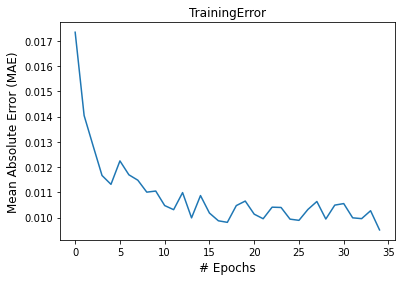

In [65]:
# MAEをプロットしてみよう
fig, ax1 = plt.subplots(1,1)
 
ax1.plot(yen_history.epoch, yen_history.history['loss'])
ax1.set_title('TrainingError')
 
if yen_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

In [66]:
#作成したモデルを使用し予測。
train_pred = yen_model.predict(train_lstm_in)
# test_pred = yen_model.predict(X_test)

In [67]:
# train_pred

In [68]:
np.transpose(train_pred)

array([[ 0.03883201,  0.04780374,  0.05826216,  0.05445197,  0.03017218,
         0.01281901,  0.01679802,  0.00796391,  0.01890104,  0.02326125,
         0.01533746,  0.0132382 ,  0.00809581, -0.00292573, -0.01665156,
        -0.00811166,  0.00201389,  0.02771225,  0.03295217,  0.03503313,
         0.04344948,  0.04206578,  0.04995623,  0.03730384,  0.0356897 ,
         0.04406722,  0.03655251,  0.03482179,  0.00938322,  0.00380266,
        -0.00360479,  0.0082583 , -0.01448064, -0.00547153,  0.00394591,
        -0.0079506 ,  0.00556189, -0.01745868, -0.00750218, -0.0060867 ,
         0.01672488,  0.0266222 ,  0.03928475,  0.04130291,  0.04018167,
         0.03442685,  0.03116189,  0.01239322, -0.01203806, -0.01408545,
        -0.03682201, -0.02147096,  0.01060654,  0.02287982,  0.04930146,
         0.0344951 ,  0.02628086,  0.03303369,  0.03432774,  0.02905671,
         0.01826709,  0.00630623,  0.00407844,  0.00798188,  0.01247954,
         0.01017701,  0.00721648,  0.01543311,  0.0

In [69]:
len(train_pred)

175

In [70]:
lstm_train_out

array([ 0.03198294,  0.04787424,  0.06019348,  0.03708937,  0.00482925,
        0.01652893,  0.00306853,  0.00135181,  0.00510899,  0.01888088,
       -0.00304878,  0.00407886, -0.01923726, -0.03151474, -0.02493261,
       -0.006456  ,  0.0013541 ,  0.00584997,  0.03813856,  0.04526607,
        0.03967168,  0.0311021 ,  0.04173794,  0.04651163,  0.03636364,
        0.02796053,  0.02295082,  0.01642036,  0.        , -0.02392344,
       -0.0032    , -0.04166667, -0.01130856, -0.02415459, -0.00490196,
       -0.04205457, -0.00468227, -0.03300654, -0.01320132, -0.01642036,
        0.00871314,  0.02990591,  0.03751267,  0.03344482,  0.03005008,
        0.03488372,  0.00163132, -0.02117264, -0.03300971, -0.05024311,
       -0.04911717, -0.02117264,  0.00665557,  0.02242303,  0.03412969,
        0.02970966,  0.02995008,  0.03140496,  0.00818331,  0.01815182,
        0.01147541, -0.00323102, -0.01602564,  0.00162338, -0.00324149,
       -0.00324149,  0.        ,  0.00162866, -0.02106969, -0.03

In [71]:
len(lstm_train_out)

175

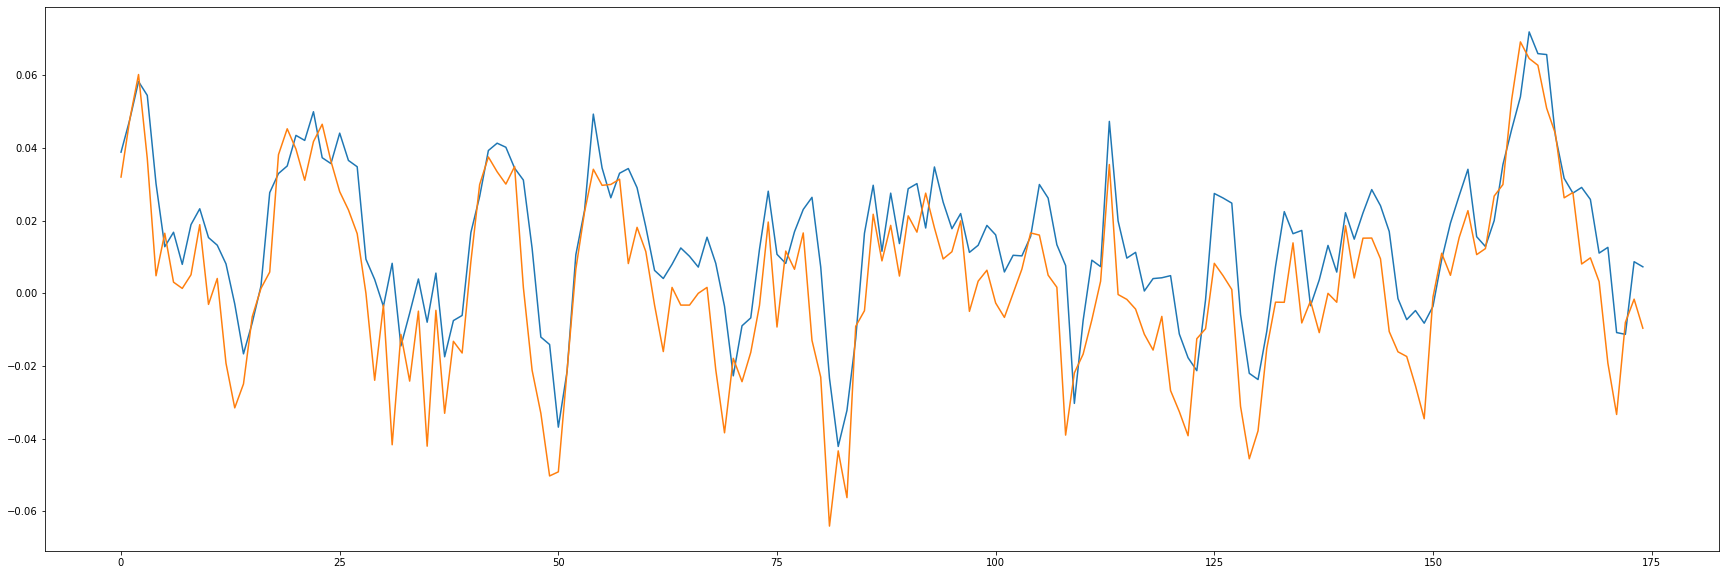

In [72]:
fig,ax = plt.subplots(figsize=(30,10))
# plt.plot(train_pred)

ax.plot(train_pred)
ax.plot(lstm_train_out)
plt.show()

In [73]:
# 配列には変化量が入っているので１００倍
np.transpose(train_pred+1)

array([[1.0388321 , 1.0478038 , 1.0582621 , 1.054452  , 1.0301722 ,
        1.012819  , 1.016798  , 1.0079639 , 1.018901  , 1.0232613 ,
        1.0153375 , 1.0132382 , 1.0080959 , 0.99707425, 0.9833484 ,
        0.99188834, 1.0020139 , 1.0277122 , 1.0329522 , 1.0350331 ,
        1.0434495 , 1.0420657 , 1.0499562 , 1.0373038 , 1.0356897 ,
        1.0440673 , 1.0365525 , 1.0348217 , 1.0093832 , 1.0038027 ,
        0.99639523, 1.0082583 , 0.98551935, 0.9945285 , 1.003946  ,
        0.9920494 , 1.005562  , 0.9825413 , 0.9924978 , 0.9939133 ,
        1.0167248 , 1.0266222 , 1.0392847 , 1.0413029 , 1.0401816 ,
        1.0344268 , 1.0311619 , 1.0123932 , 0.98796195, 0.9859145 ,
        0.963178  , 0.97852904, 1.0106065 , 1.0228798 , 1.0493015 ,
        1.0344951 , 1.0262809 , 1.0330337 , 1.0343277 , 1.0290567 ,
        1.018267  , 1.0063063 , 1.0040784 , 1.0079819 , 1.0124795 ,
        1.010177  , 1.0072165 , 1.0154331 , 1.0082343 , 0.99641114,
        0.97729635, 0.9910653 , 0.99323714, 1.01

In [74]:
#予測データ(変化量)を単価に直したもの
Pred_Train_Price_Array=(np.transpose(train_pred+1)* df_train['Close_x'].values[:-window_len])[0]
(np.transpose(train_pred+1)* df_train['Close_x'].values[:-window_len])[0]

array([29232.73440599, 29328.0272305 , 29536.0954833 , 29851.53449059,
       29864.69291329, 29412.2652626 , 29822.68590927, 29825.65167665,
       29914.93308067, 29807.60192156, 29972.76203156, 29809.46759701,
       29869.88034606, 29423.66101146, 29185.78137875, 29191.27397239,
       29599.49124813, 29865.31728506, 29521.77357435, 29953.8581109 ,
       30510.46399593, 30824.3045783 , 30690.21979928, 30776.80390477,
       31329.61377501, 31739.64481354, 31614.85272646, 31510.32224894,
       31341.34840965, 31469.21330094, 31137.35094666, 31457.66029358,
       30501.82386935, 30880.10906875, 30720.74596882, 30902.33868659,
       30066.30223989, 30065.76447487, 30072.68339396, 30264.65976834,
       30339.06877518, 30552.27596283, 30752.43445396, 31134.9572897 ,
       31153.44002247, 31136.24693155, 31605.11236787, 31080.47235012,
       30528.02419066, 30415.46320021, 30002.99404562, 30040.84140658,
       30368.72614622, 30563.64958763, 30744.5340991 , 30641.7453146 ,
      

In [75]:
#正解データ(変化量)を単価に直したもの
Actual_Train_Price_Array=(1+lstm_train_out)* df_train['Close_x'].values[:-window_len]
(1+lstm_train_out)* df_train['Close_x'].values[:-window_len]

array([29040., 29330., 29590., 29360., 29130., 29520., 29420., 29630.,
       29510., 29680., 29430., 29540., 29060., 28580., 28940., 29240.,
       29580., 29230., 29670., 30250., 30400., 30500., 30450., 31050.,
       31350., 31250., 31200., 30950., 31050., 30600., 31150., 29900.,
       30600., 30300., 30450., 29840., 29760., 29590., 29900., 29950.,
       30100., 30650., 30700., 30900., 30850., 31150., 30700., 30050.,
       29880., 29300., 29620., 30050., 30250., 30550., 30300., 30500.,
       30950., 31200., 30800., 30850., 30850., 30850., 30700., 30850.,
       30750., 30750., 30850., 30750., 30200., 29570., 30200., 30100.,
       30250., 30100., 30150., 29920., 30450., 30450., 30600., 29760.,
       29230., 28500., 29130., 28880., 29490., 29090., 29120., 29390.,
       29420., 29630., 29710., 29610., 30200., 29950., 29910., 30050.,
       30200., 30050., 30050., 30100., 29970., 30000., 30050., 30250.,
       30600., 30450., 30150., 30100., 29070., 29930., 29940., 29930.,
      

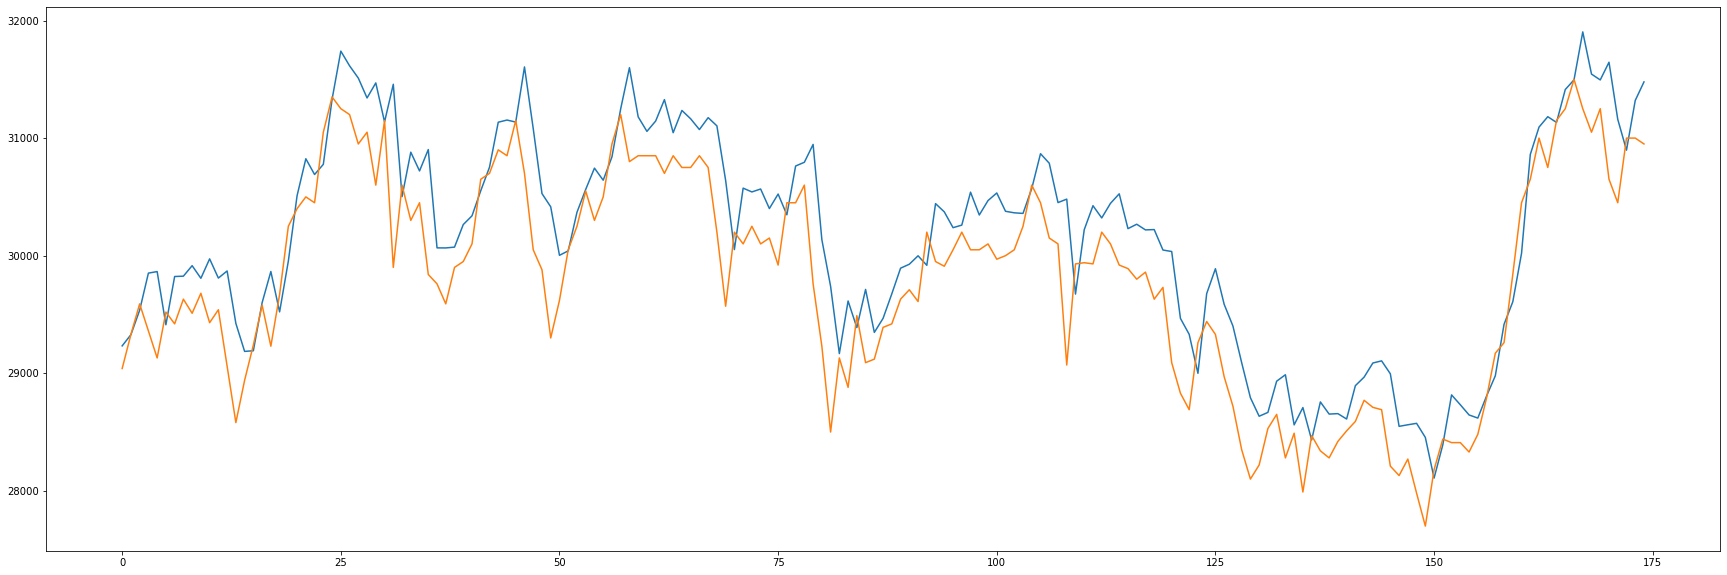

In [76]:
fig,ax = plt.subplots(figsize=(30,10))

# 予測データと正解データの併記
ax.plot(Pred_Train_Price_Array)
ax.plot(Actual_Train_Price_Array)
plt.show()

## テストデータへの転用

In [77]:
#作成したモデルを使用し予測。
test_pred = yen_model.predict(test_lstm_in)

In [78]:
len(test_pred)

57

In [79]:
np.transpose(test_pred)

array([[-0.03948381, -0.04251584, -0.02132998,  0.00061726,  0.03306846,
         0.03651318,  0.02439637,  0.02337373,  0.0325239 ,  0.03877697,
         0.04669446,  0.03838371,  0.00540202,  0.00250026, -0.0082752 ,
         0.00596808,  0.02085396,  0.01215957,  0.0175244 ,  0.02742651,
         0.02925184,  0.04501073,  0.03536378,  0.00929149,  0.00603236,
        -0.0080556 ,  0.00090459,  0.0146873 ,  0.02714534,  0.03222672,
         0.02590818,  0.00955015,  0.00960212,  0.01006625,  0.00173761,
         0.00889909, -0.01517321, -0.02862136, -0.02072014, -0.03480902,
        -0.01868415, -0.00266507,  0.00047245,  0.03035896,  0.0486856 ,
         0.0423228 ,  0.03011069,  0.0176736 ,  0.00076295,  0.00093147,
         0.02898783,  0.01113955, -0.0029912 ,  0.00895025, -0.00074166,
         0.01797934,  0.03836567]], dtype=float32)

In [80]:
len(lstm_test_out)

56

In [81]:
df_test['Close_x'].to_csv('df_test_Close.csv') #投稿するファイルを書き出す。

In [82]:
# # 予測データ(変化量)を単価に直したもの
# Pred_Price_Array=(np.transpose(test_pred+1)* df_test['Close_x'].values[:-window_len])[0]
# (np.transpose(test_pred+1)* df_test['Close_x'].values[:-window_len])[0]

In [83]:
# 予測データ(変化量)を単価に直したもの
Pred_Price_Array=(np.transpose(test_pred+1)* df_test['Close_x'].values[:-window_len+1])[0]
Pred_Price_Array
# (np.transpose(test_pred+1)* df_test['Close_x'].values[:-window_len])[0]

array([29247.71872759, 29155.39163947, 29066.49903059, 29378.12292099,
       29659.39429522, 29436.97514534, 29267.00570583, 29626.66928172,
       30366.52703047, 30259.57382798, 30406.47572279, 30570.01678467,
       30152.00504899, 30004.83384848, 29950.08863211, 30380.23643494,
       30247.90390968, 30071.26129866, 30016.96866751, 30874.16576147,
       30877.55441666, 31078.61779928, 30895.25559425, 30833.85623097,
       30633.68498683, 30502.28945911, 30527.58908272, 30846.49391174,
       31019.79064941, 31018.41178536, 30982.4285984 , 30892.2328949 ,
       31045.26364803, 31009.03451443, 30703.25727463, 30821.8672812 ,
       30234.18285847, 29821.32377028, 29623.2162416 , 29390.06615281,
       29125.45446396, 29112.20739841, 29313.84209394, 29674.33662415,
       30050.08445501, 30138.76245677, 29677.48975158, 29995.92970312,
       29802.72033691, 29687.62833118, 30175.06971359, 29874.11688387,
       29247.25316286, 29612.68935204, 29972.75389045, 29969.31304932,
      

In [84]:
typeInfo(Pred_Price_Array)

_ は ndarray型
_ の行数, 列数・・・(57,)



In [85]:
# 正解データ(変化量)を単価に直したもの
Actual_Price_Array=(1+lstm_test_out)* df_test['Close_x'].values[:-window_len]
(1+lstm_test_out)* df_test['Close_x'].values[:-window_len]

array([28400., 28570., 28950., 29410., 29130., 29050., 29440., 29990.,
       29930., 30200., 30200., 29630., 29710., 29500., 30050., 30000.,
       29740., 29840., 30550., 30450., 30750., 30500., 30400., 30200.,
       30050., 30200., 30600., 30750., 30700., 30650., 30550., 30700.,
       30700., 30250., 30450., 29680., 29190., 29300., 28800., 28655.,
       28915., 28810., 29475., 29780., 29660., 29325., 29545., 29335.,
       29350., 29995., 29440., 28835., 29405., 29440., 29695., 29715.])

In [86]:
typeInfo(Actual_Price_Array)

Actual_Price_Array は ndarray型
Actual_Price_Array の行数, 列数・・・(56,)



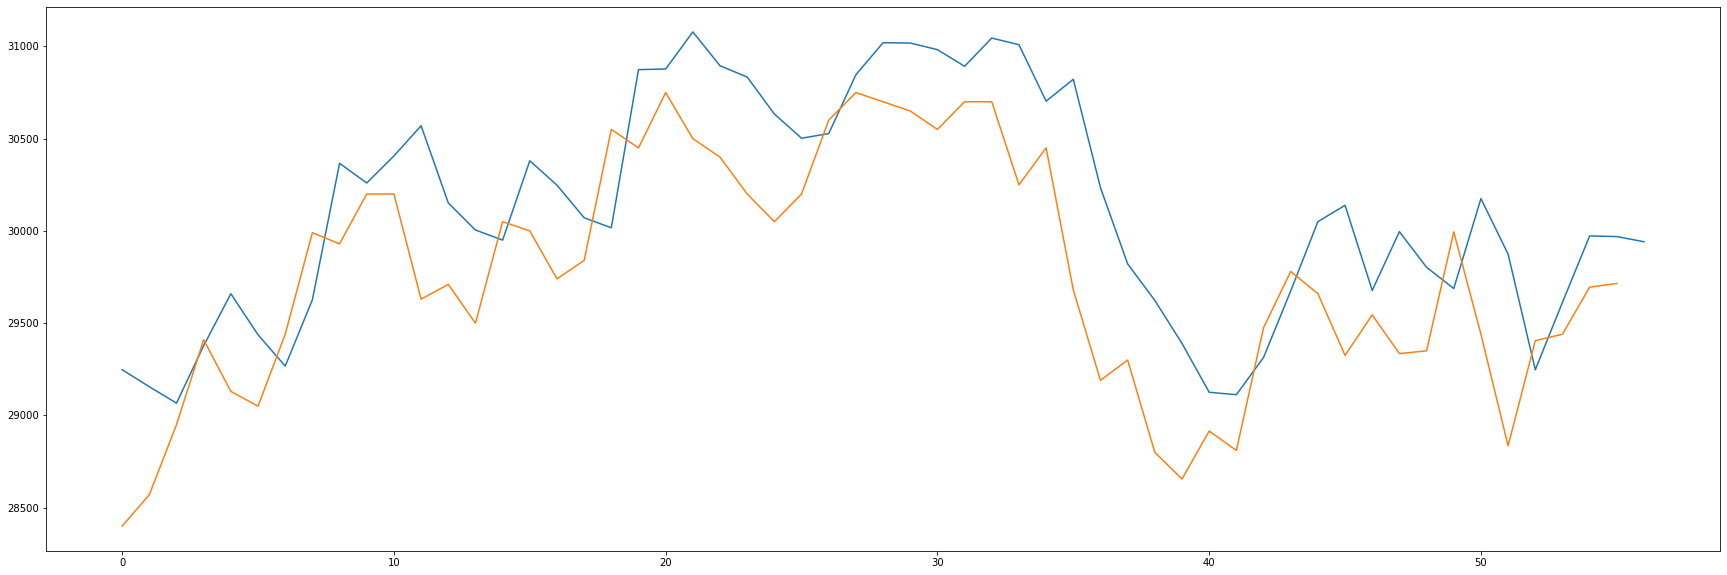

In [87]:
fig,ax = plt.subplots(figsize=(30,10))
# fig,ax = plt.subplots()

# 正解データと予測データの併記
ax.plot(Pred_Price_Array)
ax.plot(Actual_Price_Array)
plt.show()

In [88]:
len(Pred_Price_Array)

57

In [89]:
Df_Pred_Array = pd.Series(Pred_Price_Array)
Df_Pred_Array

0     29247.718728
1     29155.391639
2     29066.499031
3     29378.122921
4     29659.394295
5     29436.975145
6     29267.005706
7     29626.669282
8     30366.527030
9     30259.573828
10    30406.475723
11    30570.016785
12    30152.005049
13    30004.833848
14    29950.088632
15    30380.236435
16    30247.903910
17    30071.261299
18    30016.968668
19    30874.165761
20    30877.554417
21    31078.617799
22    30895.255594
23    30833.856231
24    30633.684987
25    30502.289459
26    30527.589083
27    30846.493912
28    31019.790649
29    31018.411785
30    30982.428598
31    30892.232895
32    31045.263648
33    31009.034514
34    30703.257275
35    30821.867281
36    30234.182858
37    29821.323770
38    29623.216242
39    29390.066153
40    29125.454464
41    29112.207398
42    29313.842094
43    29674.336624
44    30050.084455
45    30138.762457
46    29677.489752
47    29995.929703
48    29802.720337
49    29687.628331
50    30175.069714
51    29874.116884
52    29247.

In [90]:
# Df_Pred_Array_Date=pd.date_range(start='2021-09-29',periods=55, freq='D')

In [ ]:
# df_test

In [ ]:
# Drop field
drop2 = ['High','Low','Open','Low']
# drop2 = ['High_x','Low_x','Open_x','Low_x','High_y','Low_y','Open_y','Low_y','Close_y']
df_test_answer = df_test.drop(columns=drop2,axis=1).copy()
df_test_answer2=df_test_answer[window_len:]

In [ ]:
df_test_answer2

In [ ]:
len(df_test_answer2)

In [ ]:
dates_DF['Close_x']=0

In [ ]:
dates_DF

In [ ]:
Predct_Merge=pd.concat([df_test_answer2,dates_DF], axis=0)

In [ ]:
Predct_Merge

In [ ]:
len(Predct_Merge)

In [ ]:
Predct_Merge[1]=Df_Pred_Array

In [ ]:

Predct_Merge